In [104]:
import pandas as pd
import numpy as np

In [105]:
df = pd.read_csv('bank-full.csv', sep=";" )

In [106]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [107]:
categories = ['age','job','marital','education','balance','housing','contact','day','month','duration','campaign','pdays','previous','poutcome','y']

In [108]:
df = df[categories]
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [109]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size= 0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train,test_size= 0.25, random_state=1)

In [110]:
df_train.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
14137,56,entrepreneur,married,tertiary,40,no,cellular,11,jul,123,2,-1,0,unknown,no
33506,33,technician,married,secondary,4790,yes,cellular,20,apr,137,1,272,2,failure,no
27524,32,technician,single,tertiary,392,yes,cellular,21,nov,148,2,-1,0,unknown,no
34058,40,admin.,divorced,secondary,2129,no,cellular,30,apr,452,1,-1,0,unknown,yes
25922,54,unemployed,married,tertiary,1180,no,cellular,19,nov,394,2,-1,0,unknown,no


In [111]:
df_val.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
20265,57,blue-collar,married,primary,856,no,cellular,11,aug,194,6,-1,0,unknown,no
23171,50,housemaid,married,primary,0,no,cellular,27,aug,52,3,-1,0,unknown,no
1272,30,management,single,tertiary,5956,yes,unknown,8,may,255,1,-1,0,unknown,no
8906,33,blue-collar,married,secondary,312,yes,unknown,4,jun,151,2,-1,0,unknown,no
24236,54,technician,single,secondary,198,yes,cellular,17,nov,120,1,171,2,failure,no


# Question 1: ROC AUC feature importance

In [90]:
Y_train = (df_train['y'] == 'yes').astype(int)
X_train = df_train.drop('y', axis =1)
numerical_categories = ['age','balance','day','duration','campaign','pdays','previous']


In [42]:
from sklearn.metrics import roc_auc_score
def calculate_AUC(x_train, y, var):
    auc = roc_auc_score(y, x_train[var])
    if auc < 0.5:
        auc = roc_auc_score(y, -x_train[var])    
    return auc    

In [43]:
result= []
for c in numerical_categories:
    result.append({'var': c, 'auc':round(calculate_AUC(X_train, Y_train, c),2)})
result

[{'var': 'age', 'auc': np.float64(0.51)},
 {'var': 'balance', 'auc': np.float64(0.59)},
 {'var': 'day', 'auc': np.float64(0.53)},
 {'var': 'duration', 'auc': np.float64(0.81)},
 {'var': 'campaign', 'auc': np.float64(0.57)},
 {'var': 'pdays', 'auc': np.float64(0.59)},
 {'var': 'previous', 'auc': np.float64(0.6)}]

#### duration has the highest AUC

# Question 2: Training the model

In [44]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

def prepare_X(X):
    Y = (X['y'] == 'yes').astype(int)
    X = X.drop('y', axis =1)
    train_dicts = X.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X = dv.fit_transform(train_dicts)
    return Y, X
def train_X(X_train, Y):
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, Y)
    return model

In [45]:
Y_train, X_train = prepare_X(df_train)
model = train_X(X_train, Y_train)

In [46]:
Y_val, X_val = prepare_X(df_val)
y_pred = model.predict_proba(X_val)[:,1]
auc = roc_auc_score(Y_val, y_pred)
round(auc,3)

np.float64(0.9)

#### 0.89 is the near answer

# Question 3: Precision and Recall

In [47]:
def determine_positive_negative_parameters(t, y_pred, Y_val):
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    actual_positive = Y_val == 1
    actual_negative = Y_val == 0
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    return tp, tn, fp, fn

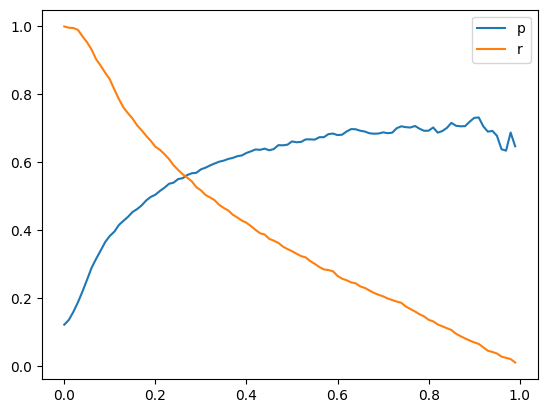

In [48]:
import matplotlib.pyplot as plt
thresholds = np.arange(0.0,1.0, step = 0.01)
def calculate_p_r(thresholds,y_pred, Y_val):
    r = []
    p = []
    for threshold in thresholds:
        tp, tn, fp, fn = determine_positive_negative_parameters(threshold, y_pred, Y_val) 
        precision = tp/ (tp + fp)
        recall = tp/(tp+fn)
        p.append(precision)
        r.append(recall)
    return r,p
r,p = calculate_p_r(thresholds,y_pred, Y_val)
plt.plot(thresholds,p , label="p")
plt.plot(thresholds, r, label="r")
plt.legend()        

#### 0.265

# Question 4: F1 score

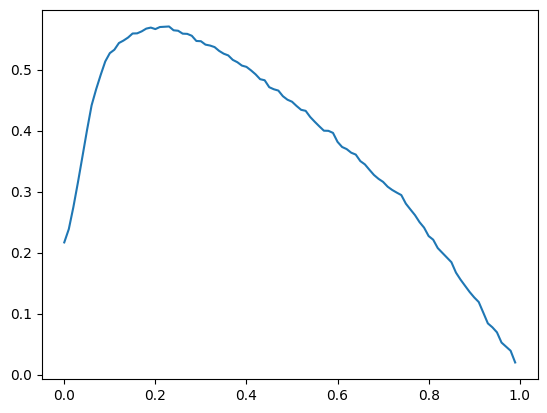

In [49]:
F1_arr = []
for threshold in thresholds:
    tp, tn, fp, fn = determine_positive_negative_parameters(threshold, y_pred, Y_val) 
    P = tp/ (tp + fp)
    R = tp/(tp+fn)
    F1 = 2*P*R/(P+R)
    F1_arr.append(F1)

plt.plot(thresholds, F1_arr)
 

#### 0.62

# Question 5: 5-Fold CV

In [125]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle = True, random_state =1)
df_full_train = pd.concat([df_train, df_val], axis=0)
res = []
for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    Y_train, X_train = prepare_X(df_train)
    Y_val, X_val = prepare_X(df_val)
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, Y_train)
    y_pred = model.predict_proba(X_val)[:,1]
    auc = roc_auc_score(Y_val, y_pred)
    res.append(auc)
np.std(res)

np.float64(0.0030263444130676524)

#### 0.0006 is the near answer

# Question 6: Hyperparameter Tuning

In [130]:
C = [0.000001, 0.001, 1]
c_scores = []
for c in C:
    kfold = KFold(n_splits=5, shuffle = True, random_state =1)
    df_full_train = pd.concat([df_train, df_val], axis=0)
    res = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        Y_train, X_train = prepare_X(df_train)
        Y_val, X_val = prepare_X(df_val)
        model = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
        model.fit(X_train, Y_train)
        y_pred = model.predict_proba(X_val)[:,1]
        auc = roc_auc_score(Y_val, y_pred)
        res.append(auc)
    c_scores.append(np.mean(res))
        
c_scores
    

[np.float64(0.7012482929047786),
 np.float64(0.8610957425341945),
 np.float64(0.9058260871819532)]